In [396]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

In [397]:
data = pd.read_csv('data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [398]:
data.shape

(4981, 11)

In [399]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [400]:
data.duplicated().any()

np.False_

In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [402]:
print(data['gender'].unique())
data["gender"] = data["gender"].map({"Male": 0, "Female": 1})
print(data['gender'].unique())

['Male' 'Female']
[0 1]


In [403]:
print(data['ever_married'].unique())
data['ever_married'] = data['ever_married'].map({"Yes":1, "No": 0})
print(data['ever_married'].unique())

['Yes' 'No']
[1 0]


In [404]:
print(data['work_type'].unique())
data['work_type'] = data['work_type'].map({"Private": 0, "Self-employed": 1, "Govt_job": 2, "children":3})
print(data['work_type'].unique())

['Private' 'Self-employed' 'Govt_job' 'children']
[0 1 2 3]


In [405]:
print(data['Residence_type'].unique())
data['Residence_type'] = data['Residence_type'].map({"Urban": 0, "Rural": 1})
print(data['Residence_type'].unique())

['Urban' 'Rural']
[0 1]


In [406]:
print(data['smoking_status'].unique())
data.drop(data.index[(data["smoking_status"] == "Unknown")],axis=0,inplace=True)
print(data['smoking_status'].unique())
data['smoking_status'] = data['smoking_status'].map({"formerly smoked": 0, "never smoked": 1, "smokes": 2})
print(data['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['formerly smoked' 'never smoked' 'smokes']
[0 1 2]


In [407]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,0,41.0,0,0,0,0,1,70.15,29.8,0,0
4977,0,40.0,0,0,1,0,0,191.15,31.1,2,0
4978,1,45.0,1,0,1,2,1,95.02,31.8,2,0
4979,0,40.0,0,0,1,0,1,83.94,30.0,2,0
4980,1,80.0,1,0,1,0,0,83.75,29.1,1,0


In [408]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3481.000000,3481.000000,3481.00000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000
mean,0.602988,49.067509,0.12324,0.065211,0.762999,0.547544,0.490376,108.769155,29.808159,0.973858,0.057742
std,0.489349,18.894255,0.32876,0.246934,0.425304,0.817267,0.499979,48.133475,6.228310,0.686617,0.233288
min,0.000000,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,55.120000,14.100000,0.000000,0.000000
25%,0.000000,34.000000,0.00000,0.000000,1.000000,0.000000,0.000000,77.450000,25.300000,1.000000,0.000000
50%,1.000000,50.000000,0.00000,0.000000,1.000000,0.000000,0.000000,92.490000,29.100000,1.000000,0.000000
75%,1.000000,64.000000,0.00000,0.000000,1.000000,1.000000,1.000000,116.250000,33.500000,1.000000,0.000000
max,1.000000,82.000000,1.00000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,2.000000,1.000000


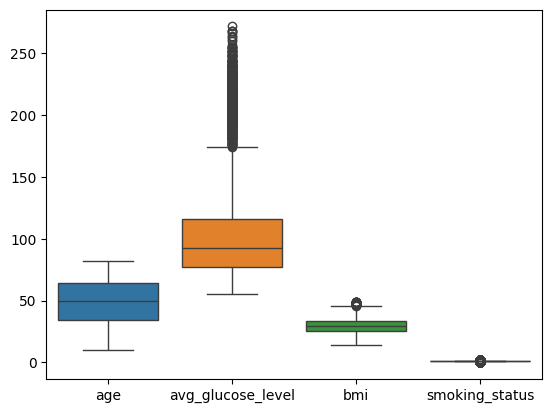

In [409]:
columns_outliers = ['age', 'avg_glucose_level', 'bmi', 'smoking_status']
sns.boxplot(data=data[columns_outliers])
plt.show()

In [410]:
def process_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        borne_inf = q1 - 1.5 * IQR
        borne_sup = q3 + 1.5 * IQR
        df = df[(df[column] >= borne_inf) & (df[column] <= borne_sup)]
    
    return df

columns_outliers = ['age', 'avg_glucose_level', 'bmi', 'smoking_status']
data = process_outliers(data, columns_outliers)

In [411]:
data.shape

(1574, 11)

In [412]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.0,1574.000000
mean,0.649936,45.070521,0.095299,0.037484,0.698221,0.557814,0.511436,91.856118,28.759657,1.0,0.036849
std,0.477141,19.487802,0.293720,0.190005,0.459176,0.856611,0.500028,23.364665,5.805704,0.0,0.188450
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.100000,1.0,0.000000
25%,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.865000,24.500000,1.0,0.000000
50%,1.000000,44.000000,0.000000,0.000000,1.000000,0.000000,1.000000,88.475000,28.200000,1.0,0.000000
75%,1.000000,59.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.300000,32.400000,1.0,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,174.430000,44.400000,1.0,1.000000


In [413]:
data.groupby(['gender', 'hypertension']).agg({'hypertension': 'count'})

hypertension
gender hypertension              
0      0                      494
       1                       57
1      0                      930
       1                       93

In [414]:
data.groupby(['gender', 'heart_disease']).agg({'heart_disease': 'count'})

heart_disease
gender heart_disease               
0      0                        516
       1                         35
1      0                        999
       1                         24

In [415]:
data.groupby(['gender', 'ever_married']).agg({'ever_married': 'count'})

ever_married
gender ever_married              
0      0                      172
       1                      379
1      0                      303
       1                      720

In [416]:
print(data['stroke'].value_counts())
data.groupby(['gender', 'stroke']).agg({'stroke': 'count'})

stroke
0    1516
1      58
Name: count, dtype: int64


stroke
gender stroke        
0      0          535
       1           16
1      0          981
       1           42

In [417]:
y = data.stroke
target = ['stroke']
x = data.drop(target, axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =42)

In [418]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [419]:
model = LogisticRegression(solver='liblinear', max_iter=100, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [420]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       461
           1       0.09      0.67      0.16        12

    accuracy                           0.82       473
   macro avg       0.54      0.74      0.53       473
weighted avg       0.97      0.82      0.88       473



In [421]:
joblib.dump(model, 'brain')

['brain']